In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime, timedelta, date

In [2]:
main_df = pd.read_csv('../data/datatypes_cleaned.csv')
main_df.head()

/var/folders/46/zm0dtt4s22d760_6ml4_t_vr0000gn/T/ipykernel_64924/4165977244.py:1: DtypeWarning: Columns (2,3,5,7,8,9,10,47) have mixed types. Specify dtype option on import or set low_memory=False.
  main_df = pd.read_csv('../data/datatypes_cleaned.csv')


,ZIP,Households (Count),White (Count),Black or African American (Count),American Indian and Alaska Native (Count),Asian (Count),Native Hawaiian and Other Pacific Islander (Count),Some other race (Count),Two or more races (Count),Hispanic or Latino origin (of any race) (Count),...,Council District,Latitude,Longitude,Mapped Location,Time to Resolve,Hours to Resolve,Days to Resolve,Neighborhood,Income Bracket,Minority Population %
0,37013,35483.0,"16,986","14,101",90.0,"1,413",0.0,"1,235","1,658","3,971",...,33.0,36.080968,-86.602406,"(36.080968, -86.602406)",4 days 23:09:25,119.156944,4.964873,Antioch / Cane Ridge,"$60,000 - $80,000",58.6
1,37013,35483.0,"16,986","14,101",90.0,"1,413",0.0,"1,235","1,658","3,971",...,28.0,36.072191,-86.664342,"(36.07219072, -86.66434192)",2 days 16:16:00,64.266667,2.677778,Antioch / Cane Ridge,"$60,000 - $80,000",58.6
2,37013,35483.0,"16,986","14,101",90.0,"1,413",0.0,"1,235","1,658","3,971",...,33.0,36.050526,-86.606362,"(36.05052579, -86.60636223)",35 days 15:25:00,855.416667,35.642361,Antioch / Cane Ridge,"$60,000 - $80,000",58.6
3,37013,35483.0,"16,986","14,101",90.0,"1,413",0.0,"1,235","1,658","3,971",...,29.0,36.073930,-86.609670,"(36.07393, -86.60967)",7 days 00:04:00,168.066667,7.002778,Antioch / Cane Ridge,"$60,000 - $80,000",58.6
4,37013,35483.0,"16,986","14,101",90.0,"1,413",0.0,"1,235","1,658","3,971",...,32.0,36.044549,-86.612186,"(36.0445494, -86.6121858)",1 days 04:29:00,28.483333,1.186806,Antioch / Cane Ridge,"$60,000 - $80,000",58.6


In [3]:
main_df['Income Bracket'].value_counts()

$60,000 - $80,000     354002
$40,000 - $60,000     238725
More Than $100,000     73329
$80,000 - $100,000     55970
Name: Income Bracket, dtype: int64

In [4]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722026 entries, 0 to 722025
Data columns (total 57 columns):
 #   Column                                                             Non-Null Count   Dtype  
---  ------                                                             --------------   -----  
 0   ZIP                                                                722026 non-null  int64  
 1   Households (Count)                                                 722026 non-null  float64
 2   White (Count)                                                      722026 non-null  object 
 3   Black or African American (Count)                                  722026 non-null  object 
 4   American Indian and Alaska Native (Count)                          722026 non-null  float64
 5   Asian (Count)                                                      722026 non-null  object 
 6   Native Hawaiian and Other Pacific Islander (Count)                 722026 non-null  float64
 7   Some other 

In [5]:
print(main_df['Request Type'].value_counts().to_string())

Trash, Recycling & Litter                          317972
Streets, Roads & Sidewalks                         171776
Public Safety                                       81498
Property Violations                                 62232
Resolved by hubNashville on First Call              37773
COVID-19                                            14038
Electric & Water General                            13642
Transit                                             10943
Other Metro Services and Forms                       4134
Parks                                                2511
Permits                                              2450
Hands On Volunteers                                  1574
Planning & Zoning                                     462
Other                                                 421
Trees                                                 308
Storm Relief                                          181
Public Records Request                                 30
Reopening Safe

In [6]:
print(main_df['Subrequest Type'].value_counts().to_string())

Cart Service                                                                   88752
Missed Pickup - Trash Cart Service                                             80753
Control Number Request for Towing                                              51313
Missed Pickup - Recycle Cart Service                                           40409
Resolved by hubNashville on First Call                                         37499
File a Trash or Recycling Complaint                                            26209
New Service/Activate Service                                                   24723
Illegal Dumping                                                                20931
Blocking the Right of Way                                                      18861
Potholes                                                                       16577
Junk and Debris                                                                14220
COVID-19 Violations                                              

In [7]:
print(main_df['Additional Subrequest Type'].value_counts().to_string())

Trash - Curbside/Alley Missed Pickup                                           69971
Control Number Request for Towing                                              51256
Roadway                                                                        41705
Recycle - Curbside/Alley Missed Pickup                                         38307
Resolved by hubNashville on First Call                                         37768
Trash - Report a Damaged Cart                                                  33340
Recycling - Request an Additional Cart                                         19678
Blocking the Right of Way                                                      14936
Junk and Debris                                                                13898
COVID-19 Violations                                                            13426
Damaged Sign                                                                   12554
Trash in Recycling Cart                                          

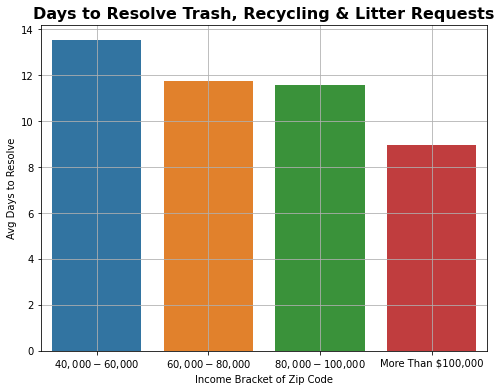

In [8]:
def trash_mean(main_df):
    return main_df['Days to Resolve'].mean()
request_trash = main_df.loc[(main_df['Request Type'] == 'Trash, Recycling & Litter')]
trash_groups = request_trash.groupby(['Income Bracket']).apply(trash_mean)
trash_groups = trash_groups.reset_index()
plt.figure(figsize = (8,6))
sns.barplot(x = 'Income Bracket', y = 0, data = trash_groups)
plt.ylabel('Avg Days to Resolve')
plt.xlabel('Income Bracket of Zip Code')
plt.title('Days to Resolve Trash, Recycling & Litter Requests', weight = 'bold', fontsize = 16)
plt.grid();